In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
birddata = pd.read_csv("bird_tracking.csv")
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


Text(0, 0.5, 'Lantitude')

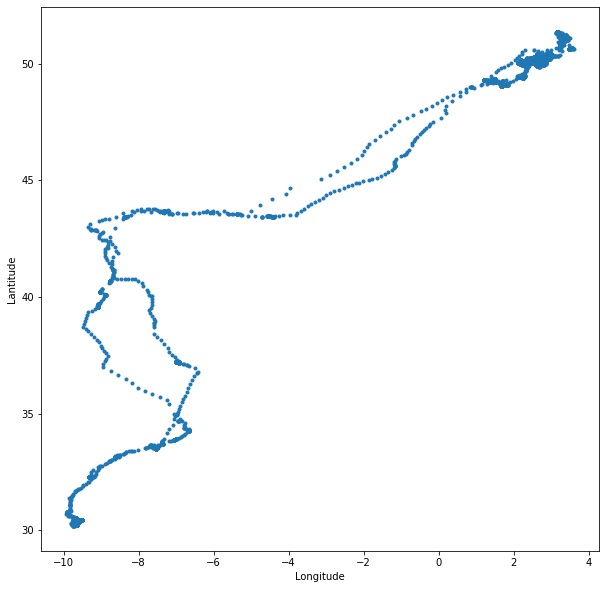

In [3]:
# Plotting trajectories of birds on 2-D planes
ind = birddata.bird_name == 'Eric'            #  taking index, for bird name Eric

x, y = birddata.longitude[ind], birddata.latitude[ind]        # Storing Longitude in x and Latitudes in y
plt.figure(figsize= (10,10))
plt.plot(x, y, ".");
plt.xlabel("Longitude")
plt.ylabel("Lantitude")

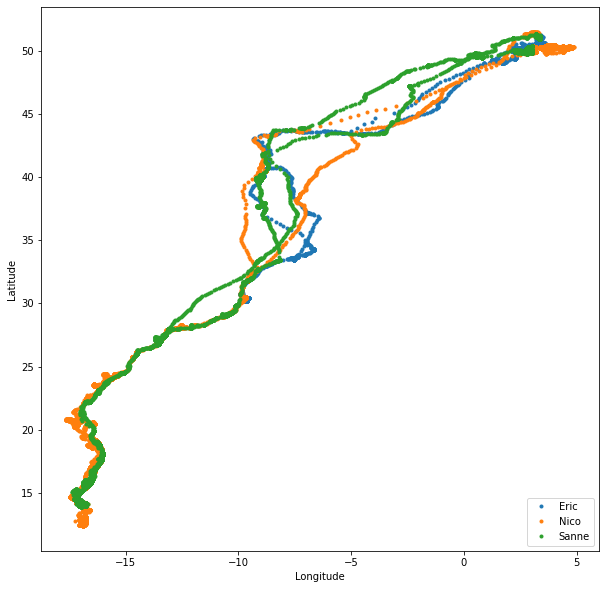

In [4]:
# Plottting for all three birds in one graph
plt.figure(figsize= (10,10))
birdnames = birddata.bird_name.unique()
for birdname in birdnames:
    ind = birddata.bird_name == birdname                                 # ****#
    x, y = birddata.longitude[ind], birddata.latitude[ind]
    plt.plot(x, y, ".", label = birdname)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc = "lower right")
plt.savefig("3_trajec.pdf")

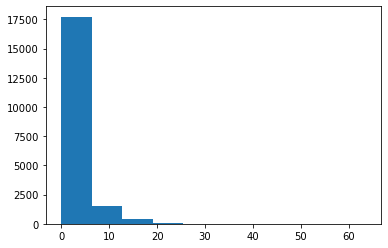

In [5]:
speed_ind = birddata.bird_name == 'Eric'             # To get the index for bird 'Eric'
speed = birddata.speed_2d[speed_ind]                # To capture speed for the particular index 'spped_ind'
numerical_ind = np.isnan(speed)               # To filter out the NaN values in dataset (desired values will be False and not number(Nan) values will be True)
plt.hist(speed[~numerical_ind]);               # Complement to get True in desired values for code execution

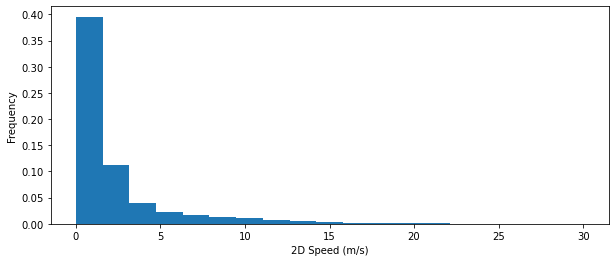

In [6]:
# Customizing histogram
plt.figure(figsize= (10,4))
plt.hist(speed[~numerical_ind], bins = np.linspace(0, 30, 20), density = True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("Eric_Speed2D.pdf")

Text(0, 0.5, 'Frequency')

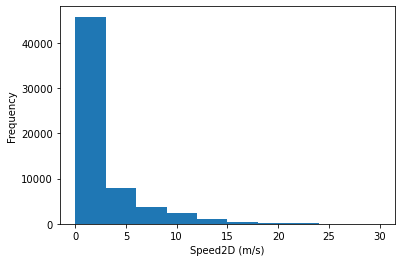

In [7]:
# Plotting speed using pandas methods 
birddata.speed_2d.plot(kind = 'hist', range = [0, 30])
plt.xlabel("Speed2D (m/s)")
plt.ylabel("Frequency")

In [8]:
# Working with datetimes and arithmetics 
import datetime

In [9]:
# The datetime column in birddata DataFrame is of type String. it needs to be coverted to datetime object.
datetime.datetime.today()

datetime.datetime(2021, 7, 19, 13, 9, 57, 430802)

In [10]:
time1 = datetime.datetime.today()

In [11]:
time2 = datetime.datetime.today()

In [12]:
time2 - time1                             # Because we can perform arithmetics on datetime objects

datetime.timedelta(microseconds=15629)

In [13]:
time3 = datetime.datetime.today()

In [14]:
time3 - time1

datetime.timedelta(microseconds=46876)

In [15]:
time3 - time2

datetime.timedelta(microseconds=31247)

In [16]:
# To convert a string datetime into a datetime object
birddata.date_time[0]

'2013-08-15 00:18:08+00'

In [17]:
date1 = birddata.date_time[0][:-3]                    # Slicing the last three unnecessary characters for timezones

In [18]:
timedate1 = datetime.datetime.strptime(date1, "%Y-%m-%d %H:%M:%S")
print(timedate1)

2013-08-15 00:18:08


In [19]:
type(timedate1)

datetime.datetime

In [20]:
date2 = birddata.date_time[1][:-3]
timedate2 = datetime.datetime.strptime(date2, "%Y-%m-%d %H:%M:%S")
type(timedate2)

datetime.datetime

In [21]:
timedate2

datetime.datetime(2013, 8, 15, 0, 48, 7)

In [22]:
date2

'2013-08-15 00:48:07'

In [23]:
timedate2 - timedate1

datetime.timedelta(seconds=1799)

In [24]:
# Adding a timestamps columns in birddata DataFrame where entries are datetime objects
dt = birddata.date_time

In [25]:
dt[:10]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
5    2013-08-15 02:47:38+00
6    2013-08-15 03:02:33+00
7    2013-08-15 03:17:27+00
8    2013-08-15 03:32:35+00
9    2013-08-15 03:47:48+00
Name: date_time, dtype: object

In [26]:
timeobjects = []
for timedates in dt:
    timeobjects.append(datetime.datetime.strptime(timedates[:-3], "%Y-%m-%d %H:%M:%S"))
timeobjects[:10]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48)]

In [27]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [28]:
birddata["timestamps"] = pd.Series(timeobjects, index = birddata.index)

In [29]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [30]:
# Doing Time analysis for bird Eric (elapsed time and stuff)
EricTime = birddata.timestamps[birddata.bird_name == 'Eric']
elapsed_time = [time - EricTime[0] for time in EricTime]
len(EricTime)

19795

In [31]:
elapsed_time[:10]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40')]

In [32]:
# Converting or calculating time in certain time units like days, hours etc
elapsed_time[1]/datetime.timedelta(days = 1)

0.02082175925925926

In [33]:
elapsed_time[1]/datetime.timedelta(hours = 1)

0.49972222222222223

In [34]:
elapsed_time[10]/datetime.timedelta(days = 1)

0.1566087962962963

In [35]:
elapsed_time[1000]/datetime.timedelta(days = 1)

12.084722222222222

In [36]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

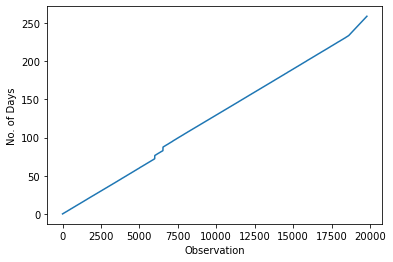

In [37]:
# Plotting the data for Bird Eric
plt.plot(np.array(elapsed_time)/datetime.timedelta(days = 1))
plt.axis("tight")
plt.xlabel("Observation")
plt.ylabel("No. of Days");
plt.savefig("EricTimeAnalysis.pdf")

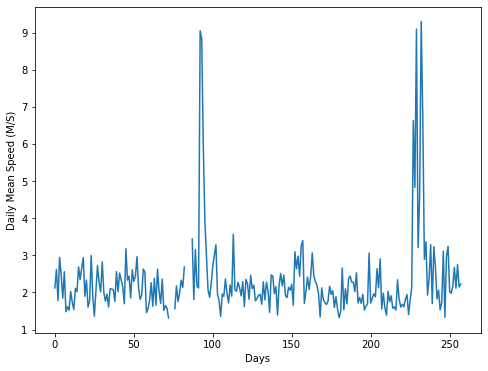

In [38]:
# Calculating and plotting daily mean speed for bird Eric (first)
inds = []
oneday = datetime.timedelta(days = 1)
daily_mean_speed = []
EricSpeed = birddata.speed_2d[birddata.bird_name == 'Eric']
for (i,t) in enumerate(elapsed_time):
    if t < oneday:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(EricSpeed[inds]))
        oneday += datetime.timedelta(days = 1)
        inds = []

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Days")
plt.ylabel("Daily Mean Speed (M/S)");

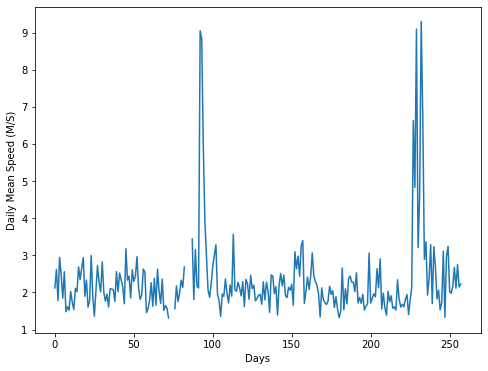

In [39]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Days")
plt.ylabel("Daily Mean Speed (M/S)")
plt.savefig("EricMeanSpeed.pdf")

In [41]:
Nico_Data = birddata[birddata.bird_name == 'Nico']

In [42]:
Nico_Data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
19795,19795,382,2013-08-15 00:20:45+00,864,145.179141,50.213455,4.394506,16.482439,Nico,2013-08-15 00:20:45
19796,19796,197,2013-08-15 00:51:00+00,864,-25.393443,50.214117,4.394010,0.360555,Nico,2013-08-15 00:51:00
19797,19797,206,2013-08-15 01:21:08+00,864,158.480445,50.213713,4.393788,0.193132,Nico,2013-08-15 01:21:08
19798,19798,200,2013-08-15 01:50:57+00,864,139.613245,50.213546,4.393801,0.800999,Nico,2013-08-15 01:50:57
19799,19799,199,2013-08-15 02:20:48+00,864,-134.485593,50.213601,4.393882,1.268267,Nico,2013-08-15 02:20:48
...,...,...,...,...,...,...,...,...,...,...
40911,40911,17,2014-04-30 20:58:41+00,864,176.395402,51.350510,3.177341,1.612452,Nico,2014-04-30 20:58:41
40912,40912,-147,2014-04-30 21:28:43+00,864,107.200939,51.350785,3.176436,0.658559,Nico,2014-04-30 21:28:43
40913,40913,11,2014-04-30 22:29:38+00,864,-169.405071,51.349890,3.176528,0.110454,Nico,2014-04-30 22:29:38
40914,40914,-57,2014-04-30 23:01:36+00,864,-140.438523,51.349492,3.175810,5.424767,Nico,2014-04-30 23:01:36


In [49]:
# Calculating Elapsed time for Nico
Nico_Data.timestamps

19795   2013-08-15 00:20:45
19796   2013-08-15 00:51:00
19797   2013-08-15 01:21:08
19798   2013-08-15 01:50:57
19799   2013-08-15 02:20:48
                ...        
40911   2014-04-30 20:58:41
40912   2014-04-30 21:28:43
40913   2014-04-30 22:29:38
40914   2014-04-30 23:01:36
40915   2014-04-30 23:31:31
Name: timestamps, Length: 21121, dtype: datetime64[ns]

In [44]:
Nico_Data.speed_2d

19795    16.482439
19796     0.360555
19797     0.193132
19798     0.800999
19799     1.268267
           ...    
40911     1.612452
40912     0.658559
40913     0.110454
40914     5.424767
40915     2.236605
Name: speed_2d, Length: 21121, dtype: float64

In [52]:
Nico_Data.timestamps.index[0]

19795

In [53]:
type(Nico_Data.timestamps.index[0])

numpy.int64

In [54]:
Nico_elapsed_time = [time - Nico_Data.timestamps[Nico_Data.timestamps.index[0]] for time in Nico_Data.timestamps]

In [55]:
len(Nico_elapsed_time)

21121

In [61]:
np.array(Nico_Data.speed_2d)[0]

array([16.48243914,  0.36055513,  0.19313208, ...,  0.11045361,
        5.42476728,  2.23660457])

In [62]:
np.array(Nico_Data.speed_2d)[0]

16.4824391398846

In [65]:
inds = []
oneday = datetime.timedelta(days = 1)
Nico_Daily_Mean_Speed = []
Nico_speed = np.array(Nico_Data.speed_2d)
for (i,t) in enumerate(elapsed_time):
    if t < oneday and ~np.isnan(Nico_speed[i]) :                       # Whenever np.isnan() is False we are good to go
        inds.append(i)
    else:
        Nico_Daily_Mean_Speed.append(np.mean(Nico_speed[inds]))
        oneday += datetime.timedelta(days = 1)
        inds = []

C:\Users\Aazar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Aazar\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


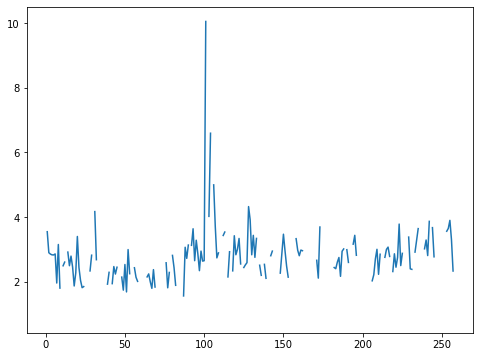

In [66]:
plt.figure(figsize=(8,6))
plt.plot(Nico_Daily_Mean_Speed)

In [78]:
np.isnan(Nico_speed[2])

False

In [100]:
inds = []
oneday = datetime.timedelta(days = 1)
Nico_Daily_Mean_Speed = []
Nico_speed = np.array(Nico_Data.speed_2d)
for (i,t) in enumerate(elapsed_time):
    if t < oneday:
        if ~np.any(Nico_speed[i]):                                  # the predicate will be False for NaN values
            print(i, end=" ")                                                   
            inds.append(i)
        else:
            continue
    else:
        Nico_Daily_Mean_Speed.append(np.mean(Nico_speed[inds]))
        oneday += datetime.timedelta(days = 1)
        inds = []

C:\Users\Aazar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Aazar\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


495 

In [101]:
len(inds)

0

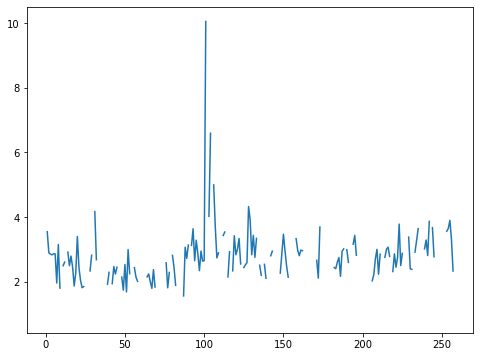

In [96]:
plt.figure(figsize=(8,6))
plt.plot(Nico_Daily_Mean_Speed);

In [97]:
sum(np.isnan(Nico_speed))

113

In [98]:
len(Nico_speed) - sum(np.isnan(Nico_speed))

21008